# Implementing ALexnet

In [2]:
# implementing alextnet 
# importing libraries
from tensorflow.keras.layers import Input, Conv2D,\
    MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
 input= Input(shape=(224, 224, 3))

In [5]:
# 1st Convolutional Layer
conv1 = Conv2D(filters=96, kernel_size=(11, 11), \
    strides=(4, 4), padding='same', activation='relu')(input)

bn1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(bn1)

In [6]:
# 2nd Convolutional Layer
conv2 = Conv2D(filters=256, kernel_size=(5, 5), \
    strides=(1, 1), padding='same', activation='relu')(pool1)
bn2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(bn2)

In [7]:
# 3rd Convolutional Layer
conv3 = Conv2D(filters=384, kernel_size=(3, 3), \
    strides=(1, 1), padding='same', activation='relu')(pool2)

In [8]:
# 4th Convolutional Layer
conv4 = Conv2D(filters=384, kernel_size=(3, 3), \
    strides=(1, 1), padding='same', activation='relu')(conv3)

In [9]:
# 5th Convolutional Layer
conv5 = Conv2D(filters=256, kernel_size=(3, 3), \
    strides=(1, 1), padding='same', activation='relu')(conv4)
bn3 = BatchNormalization()(conv5)
pool3 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(bn3)

In [10]:
# Flattening the output
flatten = Flatten()(pool3)
# 1st Fully Connected Layer
fc1 = Dense(units=4096, activation='relu')(flatten)
dropout1 = Dropout(rate=0.5)(fc1)
# 2nd Fully Connected Layer
fc2 = Dense(units=4096, activation='relu')(dropout1)
dropout2 = Dropout(rate=0.5)(fc2)
# output layer
output = Dense(units=1000, activation='softmax')(dropout2)

In [11]:
from tensorflow.keras.models import Model
# creating the model
model = Model(inputs=input, outputs=output)
# printing the model 
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024  

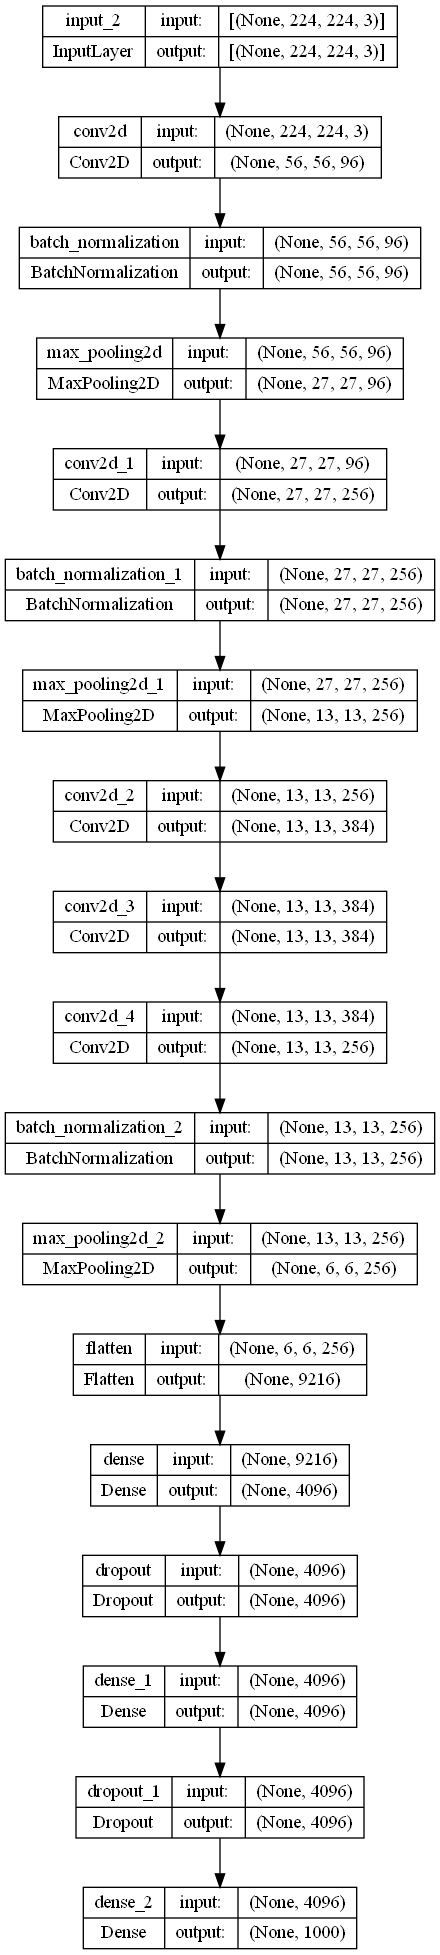

In [12]:
# now printing the model block diagram
from tensorflow.keras.utils import plot_model
# plotting the model
plot_model(model, to_file='alexnet.png', show_shapes=True, show_layer_names=True)
